In [1]:
import glob

results = []

for log_file in glob.glob("*_log.txt"):
    with open(log_file) as f:
        for line in f:
            if line.strip().startswith("1"):
                parts = line.split()
                energy = float(parts[1])
                results.append({
                    'Protein': log_file.split('_')[0],
                    'Mutation': log_file.split('_')[1],
                    'Drug': log_file.split('_')[2],
                    'Binding Energy': energy
                })
                break

import pandas as pd

df = pd.DataFrame(results)
df.to_csv("binding_affinities.csv", index=False)
df


Protein Mutation     Drug  Binding Energy
0       M1    drug1  log.txt          -6.756
1       M1    drug2  log.txt          -7.858
2       M1    drug3  log.txt          -9.044
3       M1    drug4  log.txt          -8.773
4       M1    drug5  log.txt          -7.896
5       M2    drug1  log.txt          -7.856
6       M2    drug2  log.txt          -8.346
7       M2    drug3  log.txt          -8.757
8       M2    drug4  log.txt          -8.432
9       M2    drug5  log.txt          -6.787
10      M3    drug1  log.txt          -7.505
11      M3    drug2  log.txt          -8.865
12      M3    drug3  log.txt          -8.695
13      M3    drug4  log.txt          -8.529
14      M3    drug5  log.txt          -7.355
15      WT    drug1  log.txt          -6.354
16      WT    drug2  log.txt          -7.766
17      WT    drug3  log.txt          -8.600
18      WT    drug4  log.txt          -8.419
19      WT    drug5  log.txt          -6.902

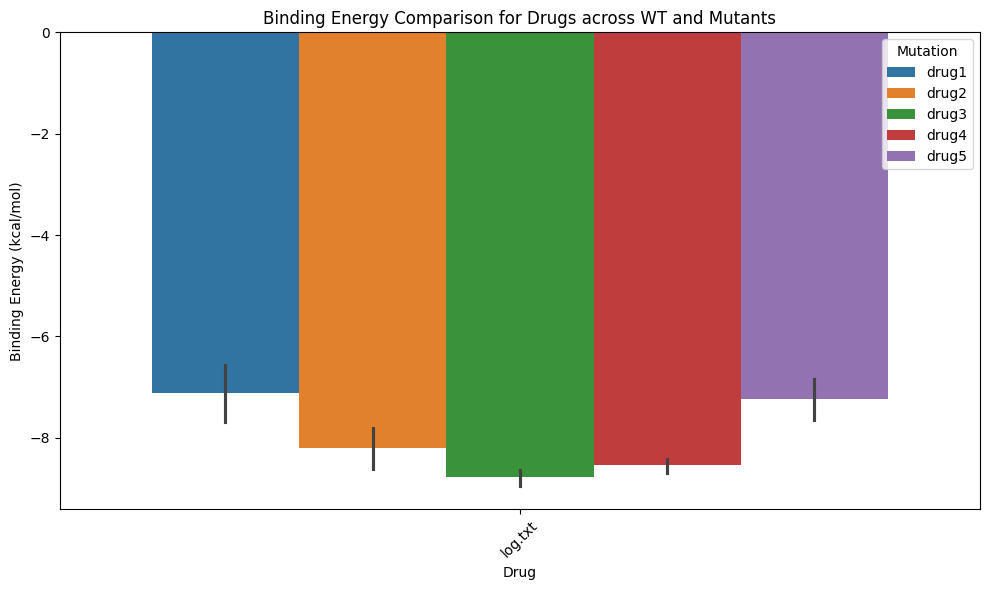

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Drug', y='Binding Energy', hue='Mutation')
plt.title("Binding Energy Comparison for Drugs across WT and Mutants")
plt.ylabel("Binding Energy (kcal/mol)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("binding_energy_comparison.png")
plt.show()


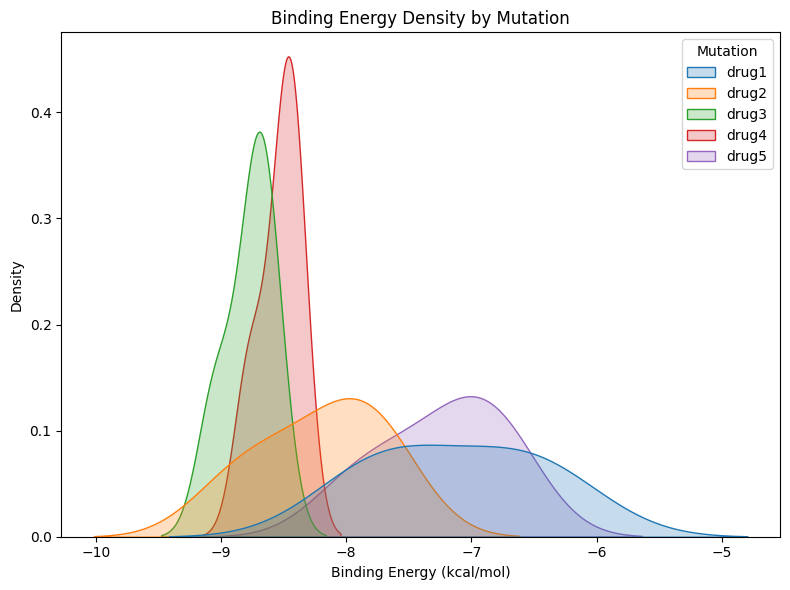

In [3]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="Binding Energy", hue="Mutation", fill=True)
plt.title("Binding Energy Density by Mutation")
plt.xlabel("Binding Energy (kcal/mol)")
plt.tight_layout()
plt.savefig("density_plot_binding.png")
plt.show()
